# Experimenting with colour scales

In this Notebook we'll look at a simple example of how changing colour scales can change our insight into a dataset. You don't need to know the Python programming language to follow this - just skip the code and read the text!

First, let's do some housekeeping to set up our Jupyter/Python environment with some standard imports and commands:

In [1]:
import math                       # Standard library of mathematical functions and constants
import numpy as np                # Numeric Python library, standard for scientific computing
import matplotlib                 # Plotting library
import matplotlib.pyplot as plt   # Gives us a convenient way to access plotting functions

# A bit of Jupyter "magic" that makes figures appear in the browser window
%matplotlib inline

## Create some sample data

First we'll create a 2D array of data to visualise. We'll use the numpy library to do this. First we create *x* and *y* axes:

In [2]:
xaxis = np.linspace(0, 2 * math.pi, 500) # x axis goes from 0 to 2*pi
yaxis = np.linspace(0, 1,           250) # y axis goes from 0 to 1

Now we "mesh" them together to produce 2D arrays (don't worry if you don't understand this):

In [3]:
x, y = np.meshgrid(xaxis, yaxis)

This is the function that will give a data value for each point in the mesh. Note that this is a very smooth function, without discontinuities or very sharp gradients.

In [7]:
def func(x, y):
  return (1 - y) * np.sin(8 * x)  # Note we have to use numpy's version of the sin() function

Now let's generate the data values:

In [8]:
z = func(x, y)

## Plot the data

The variable *z* is now a 2D array of data. We can plot this using the Matplotlib library using some different colour scales. To see a complete list of the colour scales you can choose from, see https://matplotlib.org/users/colormaps.html.

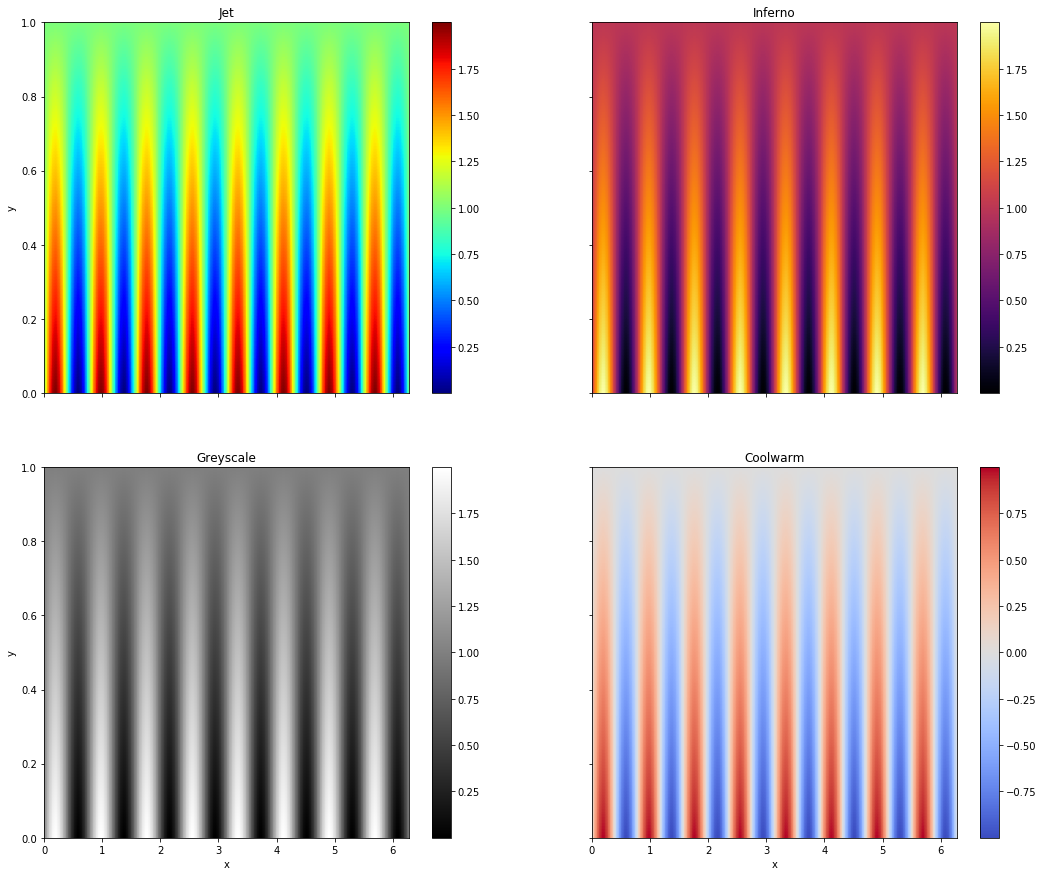

In [10]:
# Set up four subfigures in 2x2 arrangement
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(18,15))

# Top left subfigure
# The "jet" colour scale does not have uniformly-increasing brightness and can introduce artefacts
# into the visualisation, e.g. sharp apparent gradients that aren't really there.
im1 = ax1.pcolormesh(x, y, z, cmap=plt.get_cmap('jet'))
ax1.set_title("Jet")
ax1.set_ylabel("y")
fig.colorbar(im1, ax=ax1)

# Top right subfigure
# This is a "perceptually uniform" colour scale, meaning that perceived brightness increases
# linearly throughout the scale. This means that smooth gradients in the data appear as
# smooth colour transitions, without artefacts. Viridis is an alternative.
im2 = ax2.pcolormesh(x, y, z, cmap=plt.get_cmap('inferno'))
ax2.set_title("Inferno")
fig.colorbar(im2, ax=ax2)

# Bottom left subfigure
# The greyscale colour scale is nearly perceptually uniform.
im3 = ax3.pcolormesh(x, y, z, cmap=plt.get_cmap('gray'))
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Greyscale")
fig.colorbar(im3, ax=ax3)

# Bottom right subfigure
# This is a diverging colour scale with contrasting colours for positive and negative numbers.
# Each half of the scale is nearly perceptually uniform.
im4 = ax4.pcolormesh(x, y, z, cmap=plt.get_cmap('coolwarm'))
ax4.set_xlabel("x")
ax4.set_title("Coolwarm")
fig.colorbar(im4, ax=ax4)

plt.show()